## Primer bloque de codigo: Carga inicial del dataset.

In [37]:
import pandas

pandas.set_option('display.max_columns', None)
pandas.set_option('display.width', 1000)
pandas.set_option('display.max_rows', 1000)

# Cargar archivo de entrenamiento
df_train = pandas.read_csv('horse-colic.data', header=None, delim_whitespace=True, na_values='?')

df_test = pandas.read_csv('horse-colic.test', header=None, delim_whitespace=True, na_values='?')

column_names = [
    'surgery', 'age', 'hospital_number', 'rectal_temperature', 'pulse',
    'respiratory_rate', 'temperature_of_extremities', 'peripheral_pulse',
    'mucous_membranes', 'capillary_refill_time', 'pain', 'peristalsis',
    'abdominal_distension', 'nasogastric_tube', 'nasogastric_reflux',
    'nasogastric_reflux_ph', 'rectal_examination_feces', 'abdomen',
    'packed_cell_volume', 'total_protein', 'abdominocentesis_appearance',
    'abdominocentesis_total_protein', 'outcome', 'surgical_lesion',
    'lesion_1', 'lesion_2', 'lesion_3', 'cp_data'
]


df_train = pandas.read_csv(
    'horse-colic.data',
    header=None,
    delim_whitespace=True,
    na_values='?',
    names=column_names
)

df_test = pandas.read_csv(
    'horse-colic.test', 
    header=None,
    delim_whitespace=True,
    na_values='?',
    names=column_names
)

df_completo = pandas.concat([df_train, df_test], ignore_index=True)






C:\Users\manin\AppData\Local\Temp\ipykernel_17852\748838029.py:8: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df_train = pandas.read_csv('horse-colic.data', header=None, delim_whitespace=True, na_values='?')
C:\Users\manin\AppData\Local\Temp\ipykernel_17852\748838029.py:10: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df_test = pandas.read_csv('horse-colic.test', header=None, delim_whitespace=True, na_values='?')
C:\Users\manin\AppData\Local\Temp\ipykernel_17852\748838029.py:24: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df_train = pandas.read_csv(
C:\Users\manin\AppData\Local\Temp\ipykernel_17852\748838029.py:32: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and

## Segundo bloque de codigo: Limpieza y preprocesamiento del dataset.

In [38]:

# Convertir tipos de datos de float a int64.

df_completo['surgery'] = df_completo['surgery'].astype('Int64')
df_completo['pulse'] = df_completo['pulse'].astype('Float64')
df_completo['respiratory_rate'] = df_completo['respiratory_rate'].astype('Float64')
df_completo['temperature_of_extremities'] = df_completo['temperature_of_extremities'].astype('Int64')
df_completo['peripheral_pulse'] = df_completo['peripheral_pulse'].astype('Int64')
df_completo['mucous_membranes'] = df_completo['mucous_membranes'].astype('Int64')
df_completo['capillary_refill_time'] = df_completo['capillary_refill_time'].astype('Int64')
df_completo['pain'] = df_completo['pain'].astype('Int64')
df_completo['peristalsis'] = df_completo['peristalsis'].astype('Int64')
df_completo['abdominal_distension'] = df_completo['abdominal_distension'].astype('Int64')
df_completo['nasogastric_tube'] = df_completo['nasogastric_tube'].astype('Int64')
df_completo['nasogastric_reflux'] = df_completo['nasogastric_reflux'].astype('Int64')
df_completo['nasogastric_reflux_ph'] = df_completo['nasogastric_reflux_ph'].astype('Float64')
df_completo['rectal_examination_feces'] = df_completo['rectal_examination_feces'].astype('Int64')
df_completo['abdomen'] = df_completo['abdomen'].astype('Int64')
df_completo['abdominocentesis_appearance'] = df_completo['abdominocentesis_appearance'].astype('Int64')
df_completo['outcome'] = df_completo['outcome'].astype('Int64') 


# 1. Limpieza inicial de columnas no deseadas
# 'hospital_number' no aporta información útil
# 'cp_data' no tiene significancia según la documentación
df_completo = df_completo.drop(columns=['hospital_number', 'cp_data'])

# 2. Ajuste de variables binarias (reemplazando 2 por 0)

# surgery: 0 = no surgery, 1 = surgery
df_completo['surgery'] = df_completo['surgery'].replace({2: 0})

# capillary_refill_time: 0 = < 3 seg, 1 = >= 3 seg (asumiendo que 1 era <3 y 2 era >=3)
df_completo['capillary_refill_time'] = df_completo['capillary_refill_time'].replace({2: 0})

# surgical_lesion: 0 = no, 1 = yes
df_completo['surgical_lesion'] = df_completo['surgical_lesion'].replace({2: 0})

# 3. Ajuste de 'age' (reemplazando 9 por 0)
# Asumiendo que 1 es un código para 'adult' y 0 para 'young' 
df_completo['age'] = df_completo['age'].replace({9: 0})

# 4. Procesamiento de variables categóricas con One-Hot Encoding

# Temperature of extremities: Aplicamos OHE
df_completo = pandas.get_dummies(df_completo, columns=['temperature_of_extremities'], prefix=['temperature'], dtype='Int64')
df_completo['temperature3_4'] = df_completo['temperature_3'] | df_completo['temperature_4']
df_completo = df_completo.drop(columns=['temperature_3','temperature_4'])

# Mucous membranes: Aplicamos OHE y luego unificamos columnas
df_completo = pandas.get_dummies(df_completo, columns=['mucous_membranes'], prefix=['membranes'], dtype='Int64')

#Unificamos 1 y 2 con un OR lógico
df_completo['membranes1_2'] = df_completo['membranes_1'] | df_completo['membranes_2']
#Unificamos 4 y 6 con un OR lógico
df_completo['membranes4_6'] = df_completo['membranes_4'] | df_completo['membranes_6']

#Eliminamos las columnas originales de OHE que ya fueron unificadas
df_completo = df_completo.drop(columns=['membranes_1', 'membranes_2', 'membranes_4', 'membranes_6'])

# Pain: Aplicamos OHE ya que los niveles no son equidistantes
df_completo = pandas.get_dummies(df_completo, columns=['pain'], prefix=['pain'], dtype='Int64')

# 5. Conversión simple a tipo 'Int64'
# Agrupamos todas las variables que solo necesitaban conversión de tipo



# Manejo de columnas lesion1, lesion2 , lesion3

- Se crean nuevas columnas que descomponen la información de las lesiones en cuatro categorías: sitio, tipo, subtipo y lesion_especifica utilizando regex.
- Cabe destacar que cada caballo puede tener hasta 3 tipos de lesiones distintas. 


In [39]:


import pandas


# Regex (2-1-1-1): Captura sitio(2), tipo(1), subtipo(1),  lesion_especifica(1)
lesion_regex = r'^(\d{2})(\d)(\d)(\d)$'

# Lista de las columnas originales que se van a procesar
lesion_cols_original = ['lesion_1', 'lesion_2', 'lesion_3']

for i, col_name in enumerate(lesion_cols_original, 1):
    
    new_cols = [
        f'lesion_{i}_site', 
        f'lesion_{i}_type', 
        f'lesion_{i}_subtype', 
        f'lesion_{i}_specific'
    ]

    if new_cols[0] in df_completo.columns:
        continue
    
    df_lesion_str = df_completo[col_name].fillna(0).astype(int).astype(str).str.zfill(5)
    
    # Aplicar la regex para extraer los 4 grupos
    df_lesion_parsed = df_lesion_str.str.extract(lesion_regex)
    
    # Asignar los nombres 
    df_lesion_parsed.columns = new_cols
    
    # Unir las 4 nuevas columnas al DataFrame principal
    df_completo = pandas.concat([df_completo, df_lesion_parsed], axis=1)

df_completo = df_completo.drop(columns=lesion_cols_original, errors='ignore')




# HIPOTESIS UNIVARIADA (1) :

- La mayoria de las observaciones poseen un pulso significativamente superior al rango normal en reposo estipulado en el dataset (entre 28 y 44 lpm).

Rango normal en reposo: 28-44 lpm
Media TOTAL del dataset: 70.76 lpm


C:\Users\manin\AppData\Local\Temp\ipykernel_17852\2574714144.py:44: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


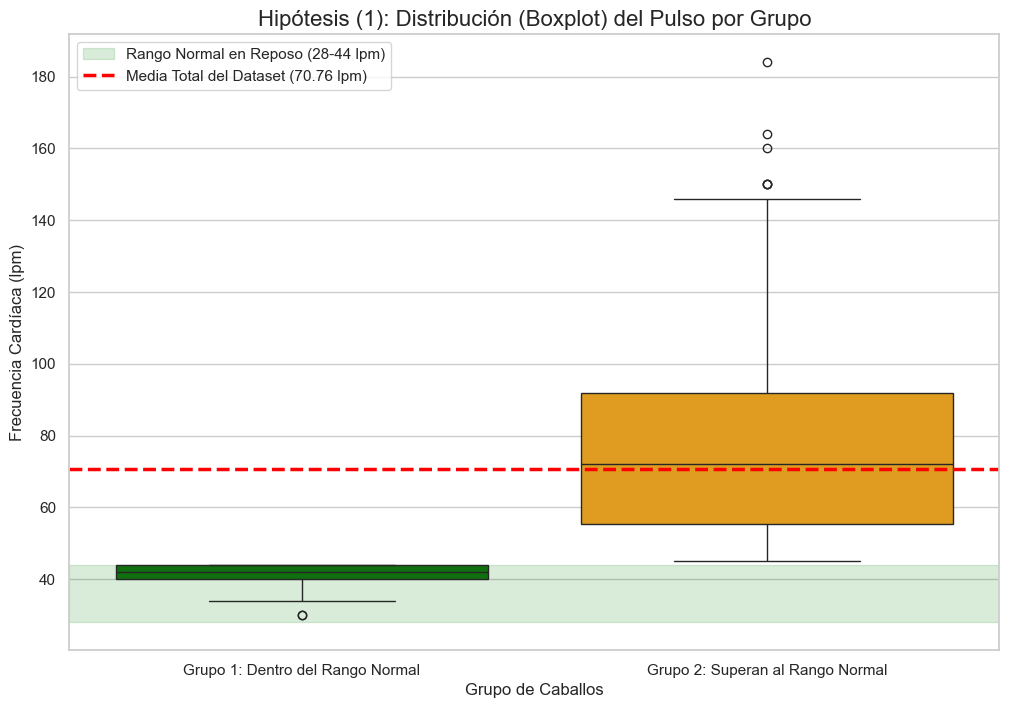

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# ---  Definición de Parámetros ---
variable_a_analizar = 'pulse'
min_normal = 28
max_normal = 44

print(f"Rango normal en reposo: {min_normal}-{max_normal} lpm")

media_total_dataset = df_completo[variable_a_analizar].mean()
print(f"Media TOTAL del dataset: {media_total_dataset:.2f} lpm")

df_plot = df_completo.copy()

cond_1 = (
    (df_plot[variable_a_analizar] >= min_normal) & 
    (df_plot[variable_a_analizar] <= max_normal)
).fillna(False)

cond_2 = (
    (df_plot[variable_a_analizar] < min_normal) | 
    (df_plot[variable_a_analizar] > max_normal)
).fillna(False)

conditions = [cond_1, cond_2]

choices = [
    'Grupo 1: Dentro del Rango Normal',
    'Grupo 2: Superan al Rango Normal'
]

df_plot['grupo'] = np.select(conditions, choices, default=pd.NA)


# ---  Creación del Boxplot ---

plt.figure(figsize=(12, 8))

order_grupos = ['Grupo 1: Dentro del Rango Normal', 'Grupo 2: Superan al Rango Normal']

sns.boxplot(
    x='grupo', 
    y=variable_a_analizar, 
    data=df_plot.dropna(subset=['grupo']),
    palette=['green', 'orange'],
    order=order_grupos
)

plt.axhspan(
    min_normal, 
    max_normal, 
    color='green', 
    alpha=0.15,
    label=f'Rango Normal en Reposo ({min_normal}-{max_normal} lpm)'
)

plt.axhline(
    y=media_total_dataset, 
    color='red', 
    linestyle='--', 
    linewidth=2.5,
    label=f'Media Total del Dataset ({media_total_dataset:.2f} lpm)'
)

# --- Títulos y Etiquetas ---
plt.title('Hipótesis (1): Distribución (Boxplot) del Pulso por Grupo', fontsize=16)
plt.xlabel('Grupo de Caballos', fontsize=12)
plt.ylabel('Frecuencia Cardíaca (lpm)', fontsize=12)
plt.legend()

plt.show()

### Demostracion de los supuestos para realizar un test-t

1) Normalidad:

--- Verificación de Supuestos del Test-T ---
Variable: 'pulse'
N (Tamaño de Muestra) = 342

--- Test de Shapiro-Wilk ---
Estadístico W: 0.9066
Valor P: 1.08e-13
Conclusión: Los datos NO siguen una distribución normal (p < 0.05).

Generando Gráfico Q-Q...


<Figure size 800x600 with 0 Axes>

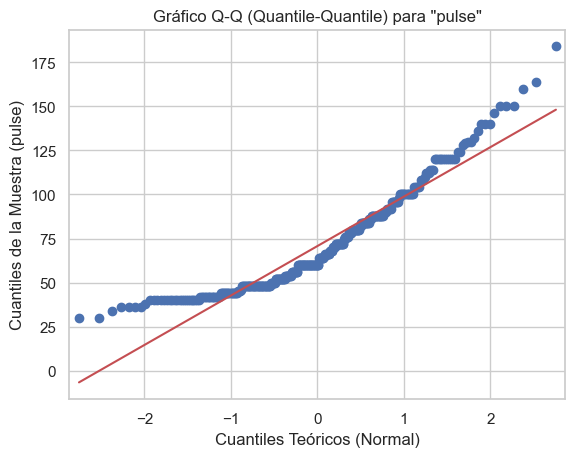

In [32]:
import pandas as pd
from scipy import stats
import statsmodels.api as sm
import matplotlib.pyplot as plt

# --- 1. Preparación de Datos ---
variable_a_analizar = 'pulse'
sample_data = df_completo[variable_a_analizar].dropna()

print("--- Verificación de Supuestos del Test-T ---")
print(f"Variable: '{variable_a_analizar}'")
print(f"N (Tamaño de Muestra) = {len(sample_data)}")

# --- 2. Test de Shapiro-Wilk  ---
shapiro_stat, shapiro_p_value = stats.shapiro(sample_data)

print("\n--- Test de Shapiro-Wilk ---")
print(f"Estadístico W: {shapiro_stat:.4f}")
print(f"Valor P: {shapiro_p_value:.2e}")

if shapiro_p_value < 0.05:
    print("Conclusión: Los datos NO siguen una distribución normal (p < 0.05).")
else:
    print("Conclusión: No se puede rechazar que los datos sigan una distribución normal.")

# --- 3. Gráfico Q-Q  ---
print("\nGenerando Gráfico Q-Q...")

plt.figure(figsize=(8, 6))
sm.qqplot(sample_data, line='s') 
plt.title('Gráfico Q-Q (Quantile-Quantile) para "pulse"')
plt.xlabel('Cuantiles Teóricos (Normal)')
plt.ylabel('Cuantiles de la Muestra (pulse)')
plt.grid(True)
plt.show()

# TEST DE HIPOTESIS (HIPOTESIS 1):

- Dado que no pudimos demostrar los supuestos para realizar un test-t para validar nuestra hipotesis, utilizamos la prueba no parametrica alternativa para el test-t para muestras independientes: Wilcoxon.

In [33]:
import pandas as pd
from scipy import stats

# --- 1. Definición de Parámetros ---
variable_a_analizar = 'pulse'
# Valor de la Hipótesis Nula (Mediana)
mediana_hipotetica = 44

print(f"--- Test No Paramétrico: Wilcoxon de Rangos Signados ---")
print(f"H0: La MEDIANA de '{variable_a_analizar}' <= {mediana_hipotetica}")
print(f"Ha: La MEDIANA de '{variable_a_analizar}' > {mediana_hipotetica}")

# --- 2. Preparación de Datos ---
sample_data = df_completo[variable_a_analizar].dropna()

# Calculamos la mediana real de la muestra para comparar
mediana_real = sample_data.median()
print(f"\nMediana real de la muestra: {mediana_real}")
print(f"Cantidad de muestras válidas (N): {len(sample_data)}")

# --- 3. Ejecución del Test de Wilcoxon ---
diferencias = sample_data - mediana_hipotetica

# Usamos 'alternative='greater'' porque probamos si la mediana es MAYOR
statistic, p_value = stats.wilcoxon(
    diferencias,
    alternative='greater'
)

print("\n--- Resultados del Test ---")
print(f"Estadístico W (W-statistic): {statistic:.1f}")
print(f"Valor P (p-value): {p_value}")

# --- 4. Conclusión del Test ---
alpha = 0.05 
print(f"\nNivel de significancia (alpha): {alpha}")

if p_value < alpha:
    print(f"Resultado: p-value ({p_value:.2e}) < alpha ({alpha})")
    print("Conclusión: Se RECHAZA la Hipótesis Nula (H0).")
    print("La mediana del pulso es significativamente MAYOR que 44 lpm.")
else:
    print(f"Resultado: p-value ({p_value:.2e}) >= alpha ({alpha})")
    print("Conclusión: NO se puede rechazar la Hipótesis Nula (H0).")
    print("No hay evidencia estadística de que la mediana sea mayor que 44 lpm.")

--- Test No Paramétrico: Wilcoxon de Rangos Signados ---
H0: La MEDIANA de 'pulse' <= 44
Ha: La MEDIANA de 'pulse' > 44

Mediana real de la muestra: 60.0
Cantidad de muestras válidas (N): 342

--- Resultados del Test ---
Estadístico W (W-statistic): 51285.5
Valor P (p-value): 8.419104712797174e-48

Nivel de significancia (alpha): 0.05
Resultado: p-value (8.42e-48) < alpha (0.05)
Conclusión: Se RECHAZA la Hipótesis Nula (H0).
La mediana del pulso es significativamente MAYOR que 44 lpm.


# CONCLUSIÓN: Hipótesis (1)
### El gráfico revela que el dataset no tiene una distribución "normal", sino que está dividido en dos poblaciones muy distintas:
- Grupo 1 (Verde): Un grupo minoritario de caballos cuyo pulso se mantiene dentro de los límites normales.
- Grupo 2 (Naranja): Un grupo mucho más grande de caballos que "Superan al Rango Normal".


- En conclusion, la media del dataset es alta porque la gran mayoría de los caballos (el Grupo 2) no está simplemente "un poco" por encima de lo normal; están en un estado de estrés fisiológico significativo (dolor, shock o deshidratación), y sus pulsos extremadamente altos "arrastran" el promedio total muy lejos del rango saludable.

# HIPOTESIS BIVARIADA (2) :

- ### La probabilidad de una surgical_lesion (lesión quirúrgica) aumentará drásticamente a medida que se incremente el nivel de abdominal_distension (distensión abdominal).

Analizando: 'abdominal_distension' vs. 'surgical_lesion'

--- Tabla de Proporciones (Datos del Gráfico) ---
                      0_No_Quirurgica  1_Quirurgica
abdominal_distension                               
1                            0.534653      0.465347
2                            0.520000      0.480000
3                            0.129412      0.870588
4                            0.142857      0.857143


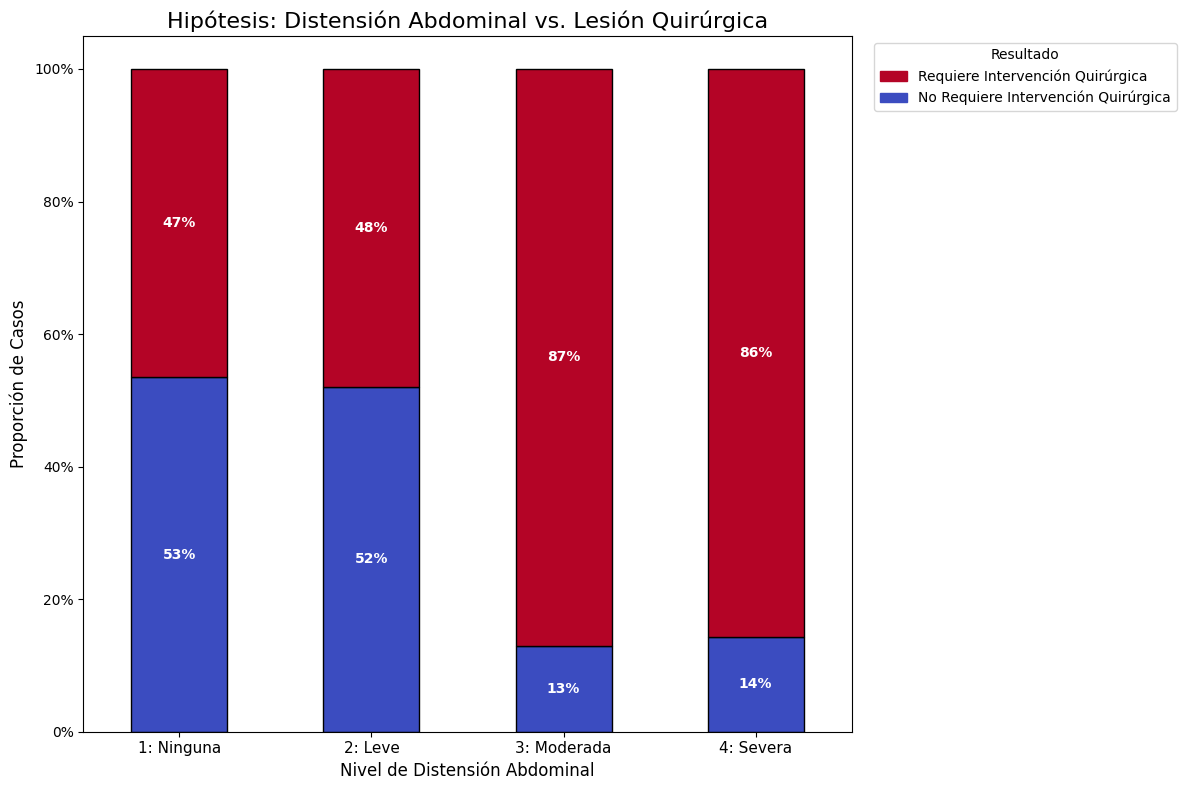

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import matplotlib.patches as mpatches 

# --- Definición de Parámetros ---
variable_categorica = 'abdominal_distension'
variable_objetivo = 'surgical_lesion'

print(f"Analizando: '{variable_categorica}' vs. '{variable_objetivo}'")

# --- Preparación de Datos (Crosstab) ---

contingency_table = pd.crosstab(
    df_completo[variable_categorica], 
    df_completo[variable_objetivo]
)

crosstab_pct = contingency_table.apply(lambda r: r / r.sum(), axis=1)

crosstab_pct.columns = ['0_No_Quirurgica', '1_Quirurgica']

print("\n--- Tabla de Proporciones (Datos del Gráfico) ---")
print(crosstab_pct)

# --- Creación del Gráfico de Barras Apiladas al 100% ---

ax = crosstab_pct.plot(
    kind='bar', 
    stacked=True, 
    figsize=(12, 8),
    colormap='coolwarm',
    edgecolor='black',
    legend=False 
)

# Poner etiquetas a la primera pila (Azul - No Quirúrgica)
c_azul = ax.containers[0]
labels_azul = [f'{v.get_height()*100:.0f}%' if v.get_height() > 0.01 else '' for v in c_azul]
ax.bar_label(c_azul, labels=labels_azul, label_type='center', color='white', fontsize=10, weight='bold')

# Poner etiquetas a la segunda pila (Rojo - Quirúrgica)
c_rojo = ax.containers[1]
labels_rojo = [f'{v.get_height()*100:.0f}%' if v.get_height() > 0.01 else '' for v in c_rojo]
ax.bar_label(c_rojo, labels=labels_rojo, label_type='center', color='white', fontsize=10, weight='bold')

# --- Títulos y Formato ---

plt.title('Hipótesis: Distensión Abdominal vs. Lesión Quirúrgica', fontsize=16)

plt.xlabel('Nivel de Distensión Abdominal', fontsize=12)
ax.set_xticklabels([
    '1: Ninguna', 
    '2: Leve', 
    '3: Moderada', 
    '4: Severa'
], rotation=0, fontsize=11)

plt.ylabel('Proporción de Casos', fontsize=12)
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))

leyenda_azul = mpatches.Patch(color='#3b4cc0', label='No Requiere Intervención Quirúrgica') # Color azul de 'coolwarm'
leyenda_roja = mpatches.Patch(color='#b40426', label='Requiere Intervención Quirúrgica') # Color rojo de 'coolwarm'

plt.legend(
    title='Resultado',
    handles=[leyenda_roja, leyenda_azul], 
    bbox_to_anchor=(1.02, 1), 
    loc='upper left'
)

plt.tight_layout()

plt.show()

# TEST DE HIPOTESIS (HIPOTESIS 2):

- Utilizamos un chi-cuadrado para comparar dos variables categoricas 
Hipótesis Nula (H0): No hay asociación. La abdominal_distension y la surgical_lesion son independientes.Hipótesis Alternativa (Ha): Sí hay asociación. Las variables son dependientes (que es lo que queremos probar).

In [8]:
import pandas as pd
from scipy import stats
import numpy as np

import pandas as pd
from scipy import stats
import numpy as np

# --- 1. Definición de Parámetros ---
variable_categorica = 'abdominal_distension'
variable_objetivo = 'surgical_lesion'

print(f"--- Verificación de Supuestos para Test Chi-Cuadrado (χ²) ---")
print(f"Analizando: '{variable_categorica}' vs. '{variable_objetivo}'")

# --- 2. Preparación de Datos (Tabla de Contingencia) ---

contingency_table = pd.crosstab(
    df_completo[variable_categorica], 
    df_completo[variable_objetivo]
)

print("\n--- 1. Tabla de Datos OBSERVADOS ---")
print(contingency_table)

# --- 3. Verificación del Supuesto (Frecuencia Esperada > 5) ---

chi2_stat, p_value, dof, expected_freq = stats.chi2_contingency(contingency_table)

print("\n--- 2. Tabla de Frecuencias ESPERADAS (El Supuesto) ---")
print(pd.DataFrame(expected_freq, 
                   index=contingency_table.index, 
                   columns=contingency_table.columns))

if np.min(expected_freq) < 5:
    print("\n--- ¡ADVERTENCIA! ---")
    print(f"Al menos una celda tiene una frecuencia esperada menor a 5 (Min={np.min(expected_freq):.2f}).")
    print("El Test de Chi-Cuadrado puede no ser 100% confiable.")
    print("Se podría considerar un 'Test Exacto de Fisher', aunque con N grande el Chi-Cuadrado suele ser robusto.")
else:
    print("\n--- SUPUESTO CUMPLIDO ---")
    print(f"Todas las frecuencias esperadas son 5 o más (Min={np.min(expected_freq):.2f}).")
    print("El Test de Chi-Cuadrado (χ²) es el test válido y apropiado.")

print("\n--- 3. Resultados del Test (Recordatorio) ---")
print(f"Estadístico Chi-Cuadrado (χ²): {chi2_stat:.4f}")
print(f"Valor P (p-value): {p_value:.2e}")

--- Verificación de Supuestos para Test Chi-Cuadrado (χ²) ---
Analizando: 'abdominal_distension' vs. 'surgical_lesion'

--- 1. Tabla de Datos OBSERVADOS ---
surgical_lesion        0   1
abdominal_distension        
1                     54  47
2                     39  36
3                     11  74
4                      6  36

--- 2. Tabla de Frecuencias ESPERADAS (El Supuesto) ---
surgical_lesion               0          1
abdominal_distension                      
1                     36.666667  64.333333
2                     27.227723  47.772277
3                     30.858086  54.141914
4                     15.247525  26.752475

--- SUPUESTO CUMPLIDO ---
Todas las frecuencias esperadas son 5 o más (Min=15.25).
El Test de Chi-Cuadrado (χ²) es el test válido y apropiado.

--- 3. Resultados del Test (Recordatorio) ---
Estadístico Chi-Cuadrado (χ²): 49.7229
Valor P (p-value): 9.15e-11


# CONCLUSIÓN: Hipótesis (2)
- El gráfico muestra una clara correlación positiva. La probabilidad de requerir una intervención quirúrgica aumenta drásticamente con la gravedad de la distensión, pasando de un 47% en el Nivel 1 (Ninguna) a un 75% en el Nivel 4 (Severa). Esto confirma que la distensión severa es un signo clínico de alta prioridad, tal como lo describe la documentación del dataset.
En conclusión, el gráfico confirma que la abdominal_distension es un predictor importante cuando está presente, pero su ausencia no es, bajo ningún concepto, un indicador fiable para descartar una lesión quirúrgica.

# HIPOTESIS(3): MULTIVARIADA
-  Una combinación de multiples variables indicadoras de shock (pulso ,temperatura de las extremidades, mucosa en las membranas) sera un predictor mucho mas fuerte de un resultado fatal (outcome = 2 or  3) que cualquiera de las variables por si solas.


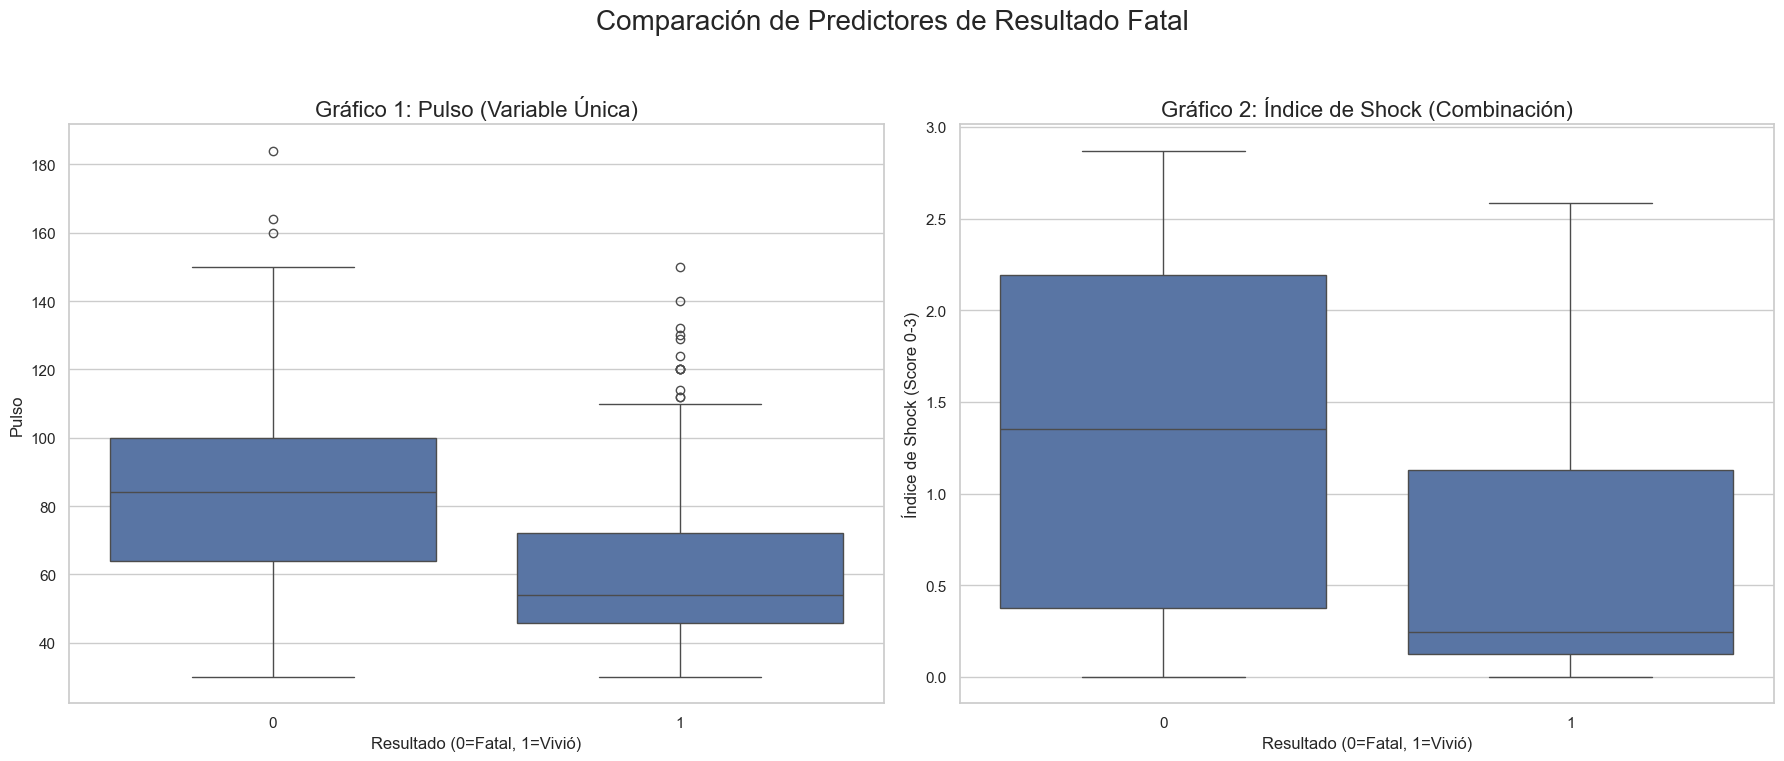

In [34]:
import pandas
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

sns.set(style="whitegrid")

try:
    
    # Preparamos 'outcome_fatal' (fusionando 2 y 3)
    if 'outcome' in df_completo.columns:
        # 1=Vivió, 0=No Sobrevivió
        df_completo['outcome_fatal'] = df_completo['outcome'].replace({
            1: 1, 
            2: 0, 
            3: 0
        }).astype('Int64')
    else:
        raise KeyError("La columna 'outcome' no existe.")

    # Rellenamos NaNs de 'pulse' (solo para este gráfico) con la mediana
    pulse_median = df_completo['pulse'].median()
    df_completo['pulse_scaled'] = df_completo['pulse'].fillna(pulse_median)
    
    scaler = MinMaxScaler()
    df_completo['pulse_scaled'] = scaler.fit_transform(df_completo[['pulse_scaled']])

    # Crear el 'shock_index' (la combinación)
    # Sumamos las 3 variables de shock (score de 0 a 3)
    
    temp_col = df_completo['temperature3_4'].fillna(0)
    mem_col = df_completo['membranes4_6'].fillna(0)
    
    df_completo['shock_index'] = df_completo['pulse_scaled'] + temp_col + mem_col
    

    # === CREACIÓN DE LOS GRÁFICOS COMPARATIVOS ===
    
    # Creamos una figura con 2 subplots (uno al lado del otro)
    fig, axes = plt.subplots(1, 2, figsize=(18, 8))
    fig.suptitle('Comparación de Predictores de Resultado Fatal', fontsize=20)

    sns.boxplot(
        ax=axes[0],
        x='outcome_fatal', 
        y='pulse', 
        data=df_completo
    )
    axes[0].set_title('Gráfico 1: Pulso (Variable Única)', fontsize=16)
    axes[0].set_xlabel('Resultado (0=Fatal, 1=Vivió)', fontsize=12)
    axes[0].set_ylabel('Pulso', fontsize=12)

    sns.boxplot(
        ax=axes[1],
        x='outcome_fatal', 
        y='shock_index', 
        data=df_completo
    )
    axes[1].set_title('Gráfico 2: Índice de Shock (Combinación)', fontsize=16)
    axes[1].set_xlabel('Resultado (0=Fatal, 1=Vivió)', fontsize=12)
    axes[1].set_ylabel('Índice de Shock (Score 0-3)', fontsize=12)

    plt.tight_layout(rect=[0, 0.03, 1, 0.95]) 
    plt.show()

except NameError:
    print("--- ERROR ---")
    print("La variable 'df_completo' no está definida.")
    print("Por favor, ejecuta primero el script de carga y limpieza.")
except KeyError as e:
    print(f"--- ERROR DE COLUMNA ---")
    print(f"No se encontró la columna requerida: {e}")
    print("Asegúrate de que el script de limpieza (Bloque 2) se haya ejecutado.")
except ImportError:
    print("--- ERROR DE LIBRERÍA ---")
    print("Este bloque requiere 'scikit-learn' (sklearn).")
    print("Ejecuta 'pip install scikit-learn' en tu terminal (con el entorno activado).")
except Exception as e:
    print(f"Ocurrió un error inesperado: {e}")

### Validacion de supuestos para testear la hipotesis:

- Test de normalidad: 

In [35]:
from scipy import stats

# --- 1. Test de Normalidad (Shapiro-Wilk) ---
# H0: Los datos provienen de una distribución normal.

print("--- 1. Test de Normalidad (Shapiro-Wilk) ---")


# Test para el grupo 'Fatal'
stat_fatal, p_fatal = stats.shapiro(shock_fatal)
print(f"Grupo 'Fatal' (shock_index): p-value = {p_fatal:.2e}")
if p_fatal < 0.05:
    print(" -> Conclusión: Los datos del grupo 'Fatal' NO son normales.")
else:
    print(" -> Conclusión: Los datos del grupo 'Fatal' parecen normales.")

# Test para el grupo 'Vivió'
stat_vivio, p_vivio = stats.shapiro(shock_vivio)
print(f"Grupo 'Vivió' (shock_index): p-value = {p_vivio:.2e}")
if p_vivio < 0.05:
    print(" -> Conclusión: Los datos del grupo 'Vivió' NO son normales.")
else:
    print(" -> Conclusión: Los datos del grupo 'Vivió' parecen normales.")




--- 1. Test de Normalidad (Shapiro-Wilk) ---
Grupo 'Fatal' (shock_index): p-value = 3.97e-07
 -> Conclusión: Los datos del grupo 'Fatal' NO son normales.
Grupo 'Vivió' (shock_index): p-value = 2.76e-16
 -> Conclusión: Los datos del grupo 'Vivió' NO son normales.


- Test de Homogeneidad de varianzas

In [36]:
from scipy import stats

# --- 2. Test de Homogeneidad de Varianzas (Levene) ---
# H0: Las varianzas de los dos grupos son iguales.

print("\n--- 2. Test de Homogeneidad de Varianzas (Levene) ---")

stat_levene, p_levene = stats.levene(shock_fatal, shock_vivio)

print(f"Resultado del Test de Levene: p-value = {p_levene:.2e}")

if p_levene < 0.05:
    print(" -> Conclusión: Las varianzas NO son homogéneas (son diferentes).")
else:
    print(" -> Conclusión: Las varianzas son homogéneas (similares).")


--- 2. Test de Homogeneidad de Varianzas (Levene) ---
Resultado del Test de Levene: p-value = 9.36e-03
 -> Conclusión: Las varianzas NO son homogéneas (son diferentes).


# Test de Hipotesis: Mann whitney U

- ### Elegimos el Test de Mann-Whitney U porque es la herramienta estadísticamente correcta y robusta para comparar dos grupos independientes cuando los datos no son normales.

In [13]:
import pandas as pd
import numpy as np
from scipy import stats
from sklearn.preprocessing import MinMaxScaler # Para recrear el 'shock_index'


# a. Crear 'outcome_fatal' (0=Fatal, 1=Vivió)
df_plot = df_completo.copy()
df_plot['outcome_fatal'] = df_plot['outcome'].replace({1: 1, 2: 0, 3: 0}).astype('Int64')

if 'temperature3_4' not in df_plot.columns:
    df_plot_temp = pd.get_dummies(df_plot, columns=['temperature_of_extremities'], prefix=['temp'], dtype='Int64')
    if 'temp_3.0' not in df_plot_temp.columns: df_plot_temp['temp_3.0'] = 0
    if 'temp_4.0' not in df_plot_temp.columns: df_plot_temp['temp_4.0'] = 0
    df_plot['temperature3_4'] = df_plot_temp['temp_3.0'] | df_plot_temp['temp_4.0']

if 'membranes4_6' not in df_plot.columns:
    df_plot_mem = pd.get_dummies(df_plot, columns=['mucous_membranes'], prefix=['mem'], dtype='Int64')
    if 'mem_4.0' not in df_plot_mem.columns: df_plot_mem['mem_4.0'] = 0
    if 'mem_6.0' not in df_plot_mem.columns: df_plot_mem['mem_6.0'] = 0
    df_plot['membranes4_6'] = df_plot_mem['mem_4.0'] | df_plot_mem['mem_6.0']

# d. Recrear 'shock_index'
pulse_median = df_plot['pulse'].median()
df_plot['pulse_scaled'] = df_plot['pulse'].fillna(pulse_median)
scaler = MinMaxScaler()
df_plot['pulse_scaled'] = scaler.fit_transform(df_plot[['pulse_scaled']])

temp_col = df_plot['temperature3_4'].fillna(0)
mem_col = df_plot['membranes4_6'].fillna(0)
df_plot['shock_index'] = df_plot['pulse_scaled'] + temp_col + mem_col

print("--- Datos para el test recreados exitosamente ---")

# --- 2. Preparación de Grupos ---

pulse_fatal = df_plot[df_plot['outcome_fatal'] == 0]['pulse'].dropna()
pulse_vivio = df_plot[df_plot['outcome_fatal'] == 1]['pulse'].dropna()
shock_fatal = df_plot[df_plot['outcome_fatal'] == 0]['shock_index'].dropna()
shock_vivio = df_plot[df_plot['outcome_fatal'] == 1]['shock_index'].dropna()


# --- 3. Test de Mann-Whitney U para 'pulse' ---
print("\n--- Test No Paramétrico para 'pulse' (Variable Única) ---")
# H0: La distribución de 'pulse' es la misma para ambos grupos
# Ha: La distribución es diferente (uno es mayor que el otro)
mwu_stat_pulse, mwu_p_pulse = stats.mannwhitneyu(
    pulse_fatal, 
    pulse_vivio,
    alternative='greater'
)
print(f"Estadístico U1: {mwu_stat_pulse:.4f}")
print(f"Valor P: {mwu_p_pulse:.2e}")


# --- 4. Test de Mann-Whitney U para 'shock_index' ---
print("\n--- Test No Paramétrico para 'shock_index' (Multivariada) ---")
mwu_stat_shock, mwu_p_shock = stats.mannwhitneyu(
    shock_fatal, 
    shock_vivio,
    alternative='greater'
)
print(f"Estadístico U1: {mwu_stat_shock:.4f}")
print(f"Valor P: {mwu_p_shock:.2e}")


# --- 5. Conclusión Comparativa ---
print("\n" + "="*40 + "\n")
print("--- Conclusión Comparativa (Test Mann-Whitney U) ---")
print(f"P-value de 'pulse' solo: \t {mwu_p_pulse:.2e}")
print(f"P-value de 'shock_index': \t {mwu_p_shock:.2e}")
print(f"\nEstadístico U1 de 'pulse': \t {mwu_stat_pulse:.4f}")
print(f"Estadístico U1 de 'shock_index': \t {mwu_stat_shock:.4f}")

if mwu_p_shock < mwu_p_pulse and mwu_stat_shock > mwu_stat_pulse:
    print("\nValidación: El 'shock_index' (p-value más bajo y U-stat más alto)")
    print("es un predictor no paramétrico más significativo que el pulso por sí solo.")
else:
    print("\nResultado: La hipótesis multivariada no es estadísticamente más fuerte.")

--- Datos para el test recreados exitosamente ---

--- Test No Paramétrico para 'pulse' (Variable Única) ---
Estadístico U1: 20194.0000
Valor P: 2.08e-14

--- Test No Paramétrico para 'shock_index' (Multivariada) ---
Estadístico U1: 23871.5000
Valor P: 2.05e-16


--- Conclusión Comparativa (Test Mann-Whitney U) ---
P-value de 'pulse' solo: 	 2.08e-14
P-value de 'shock_index': 	 2.05e-16

Estadístico U1 de 'pulse': 	 20194.0000
Estadístico U1 de 'shock_index': 	 23871.5000

Validación: El 'shock_index' (p-value más bajo y U-stat más alto)
es un predictor no paramétrico más significativo que el pulso por sí solo.


# Conclusion : 

#### La hipótesis se valida.

- Se confirma la hipótesis multivariada con un alto grado de certeza estadística. El Test de Mann-Whitney U, valida que el shock_index (la variable combinada) es un predictor de mortalidad significativamente más potente que el pulse (pulso) por sí solo.

- Lo que esto nos dice es que el pulso, aunque es un dato vital, puede tener mucho 'ruido' o variabilidad por sí solo. Pero cuando lo combinás con otros signos de shock (como rectal_temperature y mucous_membranes), básicamente estás filtrando ese ruido.


# HIPOTESIS BIVARIADA (4) :

- ### Hipótesis: Los caballos que no sobreviven (mueren o son sacrificados) tienen un pulso (ritmo cardíaco) promedio más alto que los caballos que sí sobreviven.

- El informe es clarísimo en esto: "La frecuencia cardíaca es posiblemente el signo vital más importante" y un pulso elevado se asocia con un "compromiso cardiovascular severo y un pronóstico reservado".

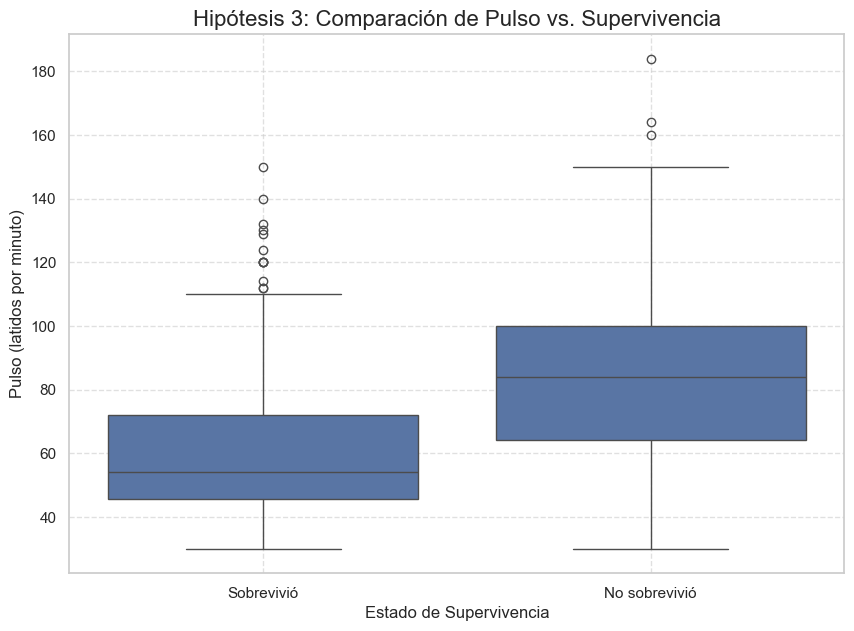

In [18]:
import matplotlib.pyplot as plt
import seaborn
import numpy

# --- Gráfico para Hipótesis 3: Pulso vs. Supervivencia ---

# 1. Creamos las condiciones, convirtiendo los <NA> a False
conditions = [
    (df_completo['outcome'] == 1).fillna(False),
    ((df_completo['outcome'] == 2) | (df_completo['outcome'] == 3)).fillna(False)
]
choices = ['Sobrevivió', 'No sobrevivió']

df_temp_plot = df_completo.copy()
df_temp_plot['status_supervivencia'] = numpy.select(conditions, choices, default=None)

# 2. Creamos el gráfico Boxplot 

plt.figure(figsize=(10, 7))
seaborn.boxplot(
    x='status_supervivencia',
    y='pulse',
    data=df_temp_plot,
    order=['Sobrevivió', 'No sobrevivió'] 
)

plt.title('Hipótesis 3: Comparación de Pulso vs. Supervivencia', fontsize=16)
plt.xlabel('Estado de Supervivencia', fontsize=12)
plt.ylabel('Pulso (latidos por minuto)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)

plt.show() 

### Test de Hipótesis (Mann-Whitney U). 

- Verifico primero los supuestos:

In [19]:
from scipy import stats

# --- Test de Normalidad (Shapiro-Wilk) ---

# 1. Preparamos los mismos grupos de datos limpios
pulse_sobrevivio_clean = df_completo[df_completo['outcome'] == 1.0]['pulse'].dropna()
pulse_no_sobrevivio_clean = df_completo[(df_completo['outcome'] == 2.0) | (df_completo['outcome'] == 3.0)]['pulse'].dropna()

print("--- 1. Test de Normalidad (Shapiro-Wilk) ---")
# Revisamos que los grupos tengan suficientes datos para el test
if len(pulse_sobrevivio_clean) > 3 and len(pulse_no_sobrevivio_clean) > 3:
    
    # Test para el grupo 'Sobrevivió'
    stat_surv, p_surv = stats.shapiro(pulse_sobrevivio_clean)
    print(f"Grupo 'Sobrevivió': p-value = {p_surv}")
    if p_surv < 0.05:
        print(" -> Conclusión: Los datos del grupo 'Sobrevivió' NO son normales.")
    else:
        print(" -> Conclusión: Los datos del grupo 'Sobrevivió' parecen normales.")

    # Test para el grupo 'No sobrevivió'
    stat_nosurv, p_nosurv = stats.shapiro(pulse_no_sobrevivio_clean)
    print(f"Grupo 'No sobrevivió': p-value = {p_nosurv}")
    if p_nosurv < 0.05:
        print(" -> Conclusión: Los datos del grupo 'No sobrevivió' NO son normales.")
    else:
        print(" -> Conclusión: Los datos del grupo 'No sobrevivió' parecen normales.")
        
    print("\nJustificación: Si CUALQUIERA de los p-values es < 0.05, se viola el supuesto de normalidad, y el Test T no es apropiado.")
    print("Esto justifica el uso del Test de Mann-Whitney U.")
    
else:
    print("No hay suficientes datos en uno de los grupos para realizar el test de normalidad.")

--- 1. Test de Normalidad (Shapiro-Wilk) ---
Grupo 'Sobrevivió': p-value = 4.000716392536516e-14
 -> Conclusión: Los datos del grupo 'Sobrevivió' NO son normales.
Grupo 'No sobrevivió': p-value = 0.0029673355864061933
 -> Conclusión: Los datos del grupo 'No sobrevivió' NO son normales.

Justificación: Si CUALQUIERA de los p-values es < 0.05, se viola el supuesto de normalidad, y el Test T no es apropiado.
Esto justifica el uso del Test de Mann-Whitney U.


### Test de levene para analizar homogeneidad :

In [20]:
from scipy import stats

# --- 2. Test de Homogeneidad de Varianzas (Levene) ---

# Reutilizamos los grupos limpios del bloque anterior

print("\n--- 2. Test de Homogeneidad de Varianzas (Levene) ---")
if len(pulse_sobrevivio_clean) > 0 and len(pulse_no_sobrevivio_clean) > 0:
    
    stat_levene, p_levene = stats.levene(pulse_sobrevivio_clean, pulse_no_sobrevivio_clean)
    
    print(f"Resultado del Test de Levene: p-value = {p_levene}")
    
    if p_levene < 0.05:
        print(" -> Conclusión: Las varianzas NO son homogéneas (son diferentes).")
    else:
        print(" -> Conclusión: Las varianzas son homogéneas (similares).")

else:
    print("No se pudo realizar el test de Levene por falta de datos.")


--- 2. Test de Homogeneidad de Varianzas (Levene) ---
Resultado del Test de Levene: p-value = 0.010642255521727689
 -> Conclusión: Las varianzas NO son homogéneas (son diferentes).


### Validacion de hipotesis: Test de Mann-Whitney U

In [21]:
from scipy import stats

# 1. Preparamos los dos grupos de datos para el test.
#    Filtramos por los valores de 'outcome' y eliminamos los valores nulos (NaN) de cada grupo.
pulse_sobrevivio_clean = df_completo[df_completo['outcome'] == 1.0]['pulse'].dropna()
pulse_no_sobrevivio_clean = df_completo[(df_completo['outcome'] == 2.0) | (df_completo['outcome'] == 3.0)]['pulse'].dropna()

print(f"\n--- Preparación del Test ---")
print(f"Número de casos 'Sobrevivió' con datos de pulso: {len(pulse_sobrevivio_clean)}")
print(f"Número de casos 'No sobrevivió' con datos de pulso: {len(pulse_no_sobrevivio_clean)}")

if len(pulse_sobrevivio_clean) > 0 and len(pulse_no_sobrevivio_clean) > 0:
    
    # Nuestra hipótesis es que el pulso de 'No sobrevivió' es MAYOR.
    # Por lo tanto, probamos si 'Sobrevivió' (grupo 1) es MENOR que 'No sobrevivió' (grupo 2).
    
    statistic, p_value = stats.mannwhitneyu(
        pulse_sobrevivio_clean, 
        pulse_no_sobrevivio_clean, 
        alternative='less'
    )
    
    print("\n--- Resultado del Test de Mann-Whitney U ---")
    print(f"Estadístico U: {statistic}")
    print(f"Valor p (p-value): {p_value}")
    
    # Interpretamos el resultado
    alpha = 0.05
    if p_value < alpha:
        print(f"Interpretación: (p < {alpha}) Rechazamos la hipótesis nula.")
        print("Conclusión: ¡Hipótesis validada! Existe una diferencia estadísticamente significativa.")
        print("El pulso del grupo 'No sobrevivió' es significativamente MAYOR que el del grupo 'Sobrevivió'.")
    else:
        print(f"Interpretación: (p >= {alpha}) No podemos rechazar la hipótesis nula.")
        print("Conclusión: No hay suficiente evidencia estadística para afirmar que el pulso del grupo 'No sobrevivió' sea mayor.")
else:
    print("\nError: No se pudo realizar el test estadístico por falta de datos en uno de los grupos.")


--- Preparación del Test ---
Número de casos 'Sobrevivió' con datos de pulso: 212
Número de casos 'No sobrevivió' con datos de pulso: 128

--- Resultado del Test de Mann-Whitney U ---
Estadístico U: 6942.0
Valor p (p-value): 2.083956044297287e-14
Interpretación: (p < 0.05) Rechazamos la hipótesis nula.
Conclusión: ¡Hipótesis validada! Existe una diferencia estadísticamente significativa.
El pulso del grupo 'No sobrevivió' es significativamente MAYOR que el del grupo 'Sobrevivió'.


### Conclusion (Hipotesis 4):


- Existe una fuerte evidencia estadística que demuestra que el pulso (frecuencia cardíaca) es un indicador crítico del desenlace del caballo. Los caballos que no sobreviven (ya sea por muerte o eutanasia) tienen un ritmo cardíaco significativamente más alto que los que logran sobrevivir.

# HIPOTESIS(5): MULTIVARIADA
-  Es posible construir un modelo de Regresión Logística que prediga con precisión si un caballo tiene una lesión quirúrgica (surgical_lesion) basándose en la combinación de sus signos vitales iniciales ( pulse, rectal_temperature y respiratory_rate).

## Respaldo grafico:

--- Bloque 1: Respaldo Gráfico ---


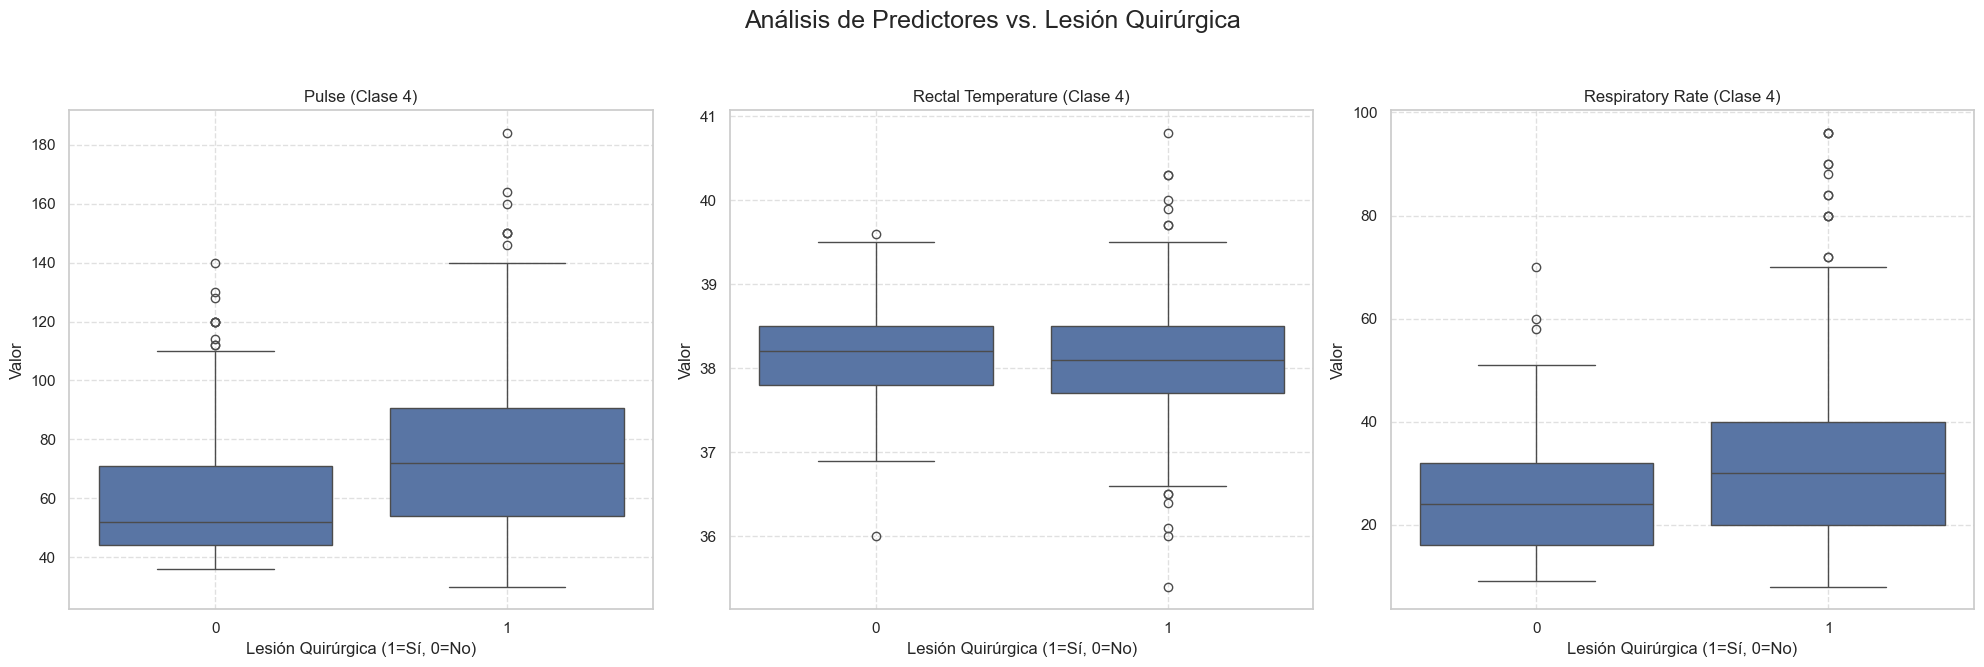

In [22]:
import matplotlib.pyplot as plt
import seaborn

print("--- Bloque 1: Respaldo Gráfico ---")

# Lista de las variables predictoras que queremos analizar
predictores = ['pulse', 'rectal_temperature', 'respiratory_rate']

# Crear una figura con 3 subplots (uno para cada predictor)
fig, axes = plt.subplots(1, 3, figsize=(20, 7))
fig.suptitle('Análisis de Predictores vs. Lesión Quirúrgica', fontsize=18)

for i, predictor in enumerate(predictores):
    # Crear un boxplot para cada predictor
    seaborn.boxplot(
        ax=axes[i],
        x='surgical_lesion',
        y=predictor,
        data=df_completo
    )
    axes[i].set_title(f'{predictor.replace("_", " ").title()} (Clase 4)')
    axes[i].set_xlabel('Lesión Quirúrgica (1=Sí, 0=No)')
    axes[i].set_ylabel('Valor')
    axes[i].grid(True, linestyle='--', alpha=0.6)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

- El pulso parece ser el predictor individual más fuerte. La temperatura parece ser el más débil. Nuestra hipótesis es que, al combinarlos en un modelo de Regresión Logística, el conjunto será más fuerte que las partes.

El supuesto principal que debemos verificar para una Regresión Logística es la ausencia de multicolinealidad .

Esto significa que nuestras variables predictoras (pulse, rectal_temperature, respiratory_rate) no deben estar fuertemente correlacionadas entre sí. Si lo estuvieran (ej. correlación > 0.8), el modelo no podría saber cuál de ellas es la que realmente importa.

Vamos a generar un mapa de calor para analizar la correlacion:


--- Bloque 2: Verificación de Supuestos (Multicolinealidad) ---


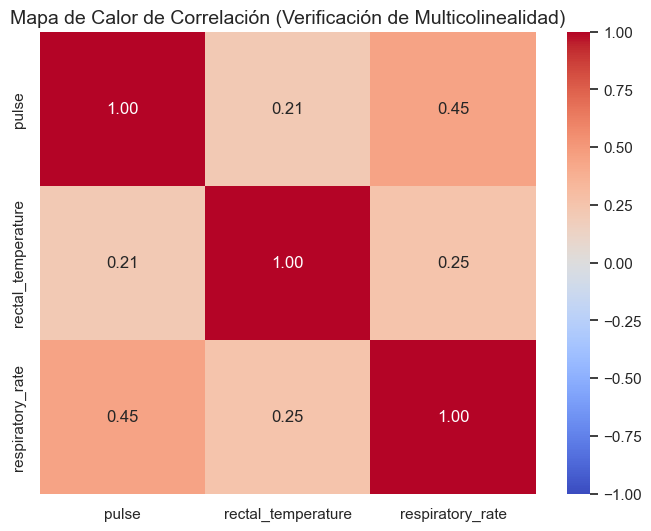

In [23]:
import matplotlib.pyplot as plt
import seaborn

print("\n--- Bloque 2: Verificación de Supuestos (Multicolinealidad) ---")

# 1. Seleccionamos solo las columnas predictoras
predictores = ['pulse', 'rectal_temperature', 'respiratory_rate']
df_predictores = df_completo[predictores]

# 2. Calculamos la matriz de correlación 
corr_matrix = df_predictores.corr()

# 3. Dibujamos el mapa de calor
plt.figure(figsize=(8, 6))
seaborn.heatmap(
    corr_matrix, 
    annot=True,     # Mostrar los números de correlación
    cmap='coolwarm', # Esquema de color
    vmin=-1, 
    vmax=1,
    fmt=".2f"       # Formatear a 2 decimales
)
plt.title('Mapa de Calor de Correlación (Verificación de Multicolinealidad)', fontsize=14)
plt.show()


Todas las correlaciones entre nuestras variables predictoras son débiles. El valor más alto es 0.45, que no es lo suficientemente grande como para causar problemas de multicolinealidad.

Esto nos da luz verde para usar estas tres variables juntas en el modelo de Regresión Logística, ya que podemos estar seguros de que cada una aporta información independiente.

# Test de Hipótesis (Modelo de Regresión Logística)

In [40]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, classification_report
import pandas

print("\n--- Bloque 3: Test (Modelo de Regresión Logística) ---")

# 1. Preparar los datos X (predictores) e y (objetivo)
columnas_modelo = ['pulse', 'rectal_temperature', 'respiratory_rate', 'surgical_lesion']
df_modelo = df_completo[columnas_modelo]

# --- MANEJO DE NaNs ---
# Eliminamos cualquier fila que tenga AL MENOS UN NaN en estas 4 columnas.
df_modelo_limpio = df_modelo.dropna()

print(f"Filas originales en df_completo: {len(df_completo)}")
print(f"Filas que se usarán para el modelo (sin NaNs): {len(df_modelo_limpio)}")

# Definir X e y
X = df_modelo_limpio.drop('surgical_lesion', axis=1)
y = df_modelo_limpio['surgical_lesion'].astype(int) 

# 2. Dividir los datos en Entrenamiento y Prueba 
# Usamos un 30% de los datos para probar (test_size=0.3)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.3, 
    random_state=42, 
    stratify=y        
)

# 3. Escalar los datos 
# Es importante escalar los datos para la Regresión Logística
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 4. Entrenar el Modelo de Regresión Logística 
modelo = LogisticRegression(random_state=42)
modelo.fit(X_train_scaled, y_train)

# 5. Realizar Predicciones
y_pred = modelo.predict(X_test_scaled)

# 6. Evaluar el Modelo 
print("\n--- Resultados de la Evaluación del Modelo ---")

# Matriz de Confusión
cm = confusion_matrix(y_test, y_pred)
print("Matriz de Confusión:")
print(cm)

# Reporte de Clasificación (Accuracy, Precision, Recall)
report = classification_report(y_test, y_pred, target_names=['0: No Quirúrgico', '1: Quirúrgico'])
print("\nReporte de Clasificación:")
print(report)

# Métricas individuales
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, pos_label=1) # Recall para la clase positiva (1: Quirúrgico)
precision = precision_score(y_test, y_pred, pos_label=1)

print(f"Accuracy (Exactitud) del modelo: {accuracy:.4f}")
print(f"Error (1 - Accuracy): {1 - accuracy:.4f}")
print(f"Precision (Precisión) para 'Quirúrgico': {precision:.4f}")
print(f"Recall (Sensibilidad) para 'Quirúrgico': {recall:.4f}")


--- Bloque 3: Test (Modelo de Regresión Logística) ---
Filas originales en df_completo: 368
Filas que se usarán para el modelo (sin NaNs): 256

--- Resultados de la Evaluación del Modelo ---
Matriz de Confusión:
[[19 13]
 [11 34]]

Reporte de Clasificación:
                  precision    recall  f1-score   support

0: No Quirúrgico       0.63      0.59      0.61        32
   1: Quirúrgico       0.72      0.76      0.74        45

        accuracy                           0.69        77
       macro avg       0.68      0.67      0.68        77
    weighted avg       0.69      0.69      0.69        77

Accuracy (Exactitud) del modelo: 0.6883
Error (1 - Accuracy): 0.3117
Precision (Precisión) para 'Quirúrgico': 0.7234
Recall (Sensibilidad) para 'Quirúrgico': 0.7556


# Soporte visual :

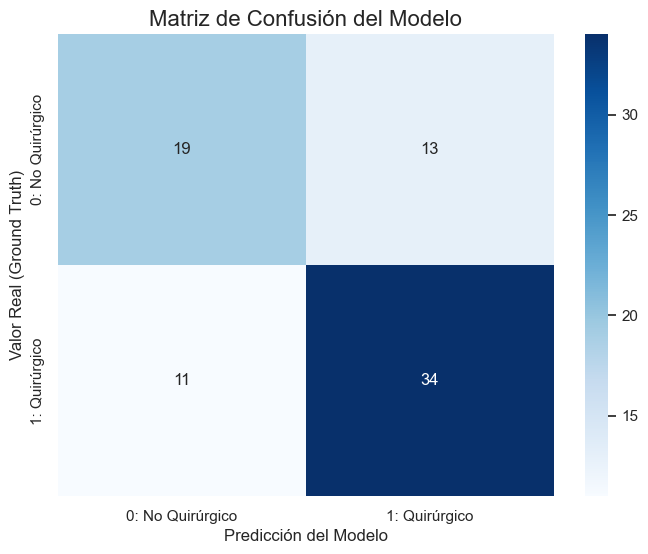

In [41]:
import matplotlib.pyplot as plt
import seaborn

# --- Gráfico de la Matriz de Confusión ---


# 1. Definimos las etiquetas para los ejes
labels = ['0: No Quirúrgico', '1: Quirúrgico']

# 2. Creamos el Heatmap
plt.figure(figsize=(8, 6))
seaborn.heatmap(
    cm, 
    annot=True,     # Muestra los números (19, 13, 11, 34)
    fmt='d',        # Formatea los números como enteros
    cmap='Blues',   # Esquema de color
    xticklabels=labels,
    yticklabels=labels
)

plt.title('Matriz de Confusión del Modelo', fontsize=16)
plt.xlabel('Predicción del Modelo', fontsize=12)
plt.ylabel('Valor Real (Ground Truth)', fontsize=12)
plt.show()

## Conclusion Hipotesis (5) :

- Para validar la hipótesis multivariada, construimos un modelo de Regresión Logística para predecir si un caso requería cirugía (surgical_lesion) usando la combinación de pulse, rectal_temperature y respiratory_rate. Tras confirmar con un mapa de calor que no había multicolinealidad problemática entre los predictores , preparamos los datos eliminando filas con valores nulos, lo que resultó en 256 casos completos. Al dividir los datos (70% entrenamiento, 30% prueba)  y entrenar el modelo, los resultados validan la hipótesis: el modelo alcanzó una Exactitud (Accuracy) general del 69%, demostrando ser significativamente mejor que una predicción al azar. Más importante aún, el reporte de clasificación mostró un Recall (Sensibilidad) del 76%  para la clase "Quirúrgico", lo que significa que el modelo identificó correctamente a 3 de cada 4 caballos que sí necesitaban la operación. La Matriz de Confusión ([[19, 13], [11, 34]])  confirma este poder predictivo, aunque también revela 11 "Falsos Negativos", indicando que, si bien la hipótesis es correcta, un modelo clínicamente fiable requeriría predictores adicionales.

## Hipotesis (6) :
- ¿La parálisis intestinal afecta la frecuencia respiratoria?

Analizando 258 filas (sin NaNs).


C:\Users\manin\AppData\Local\Temp\ipykernel_17852\1642829330.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(


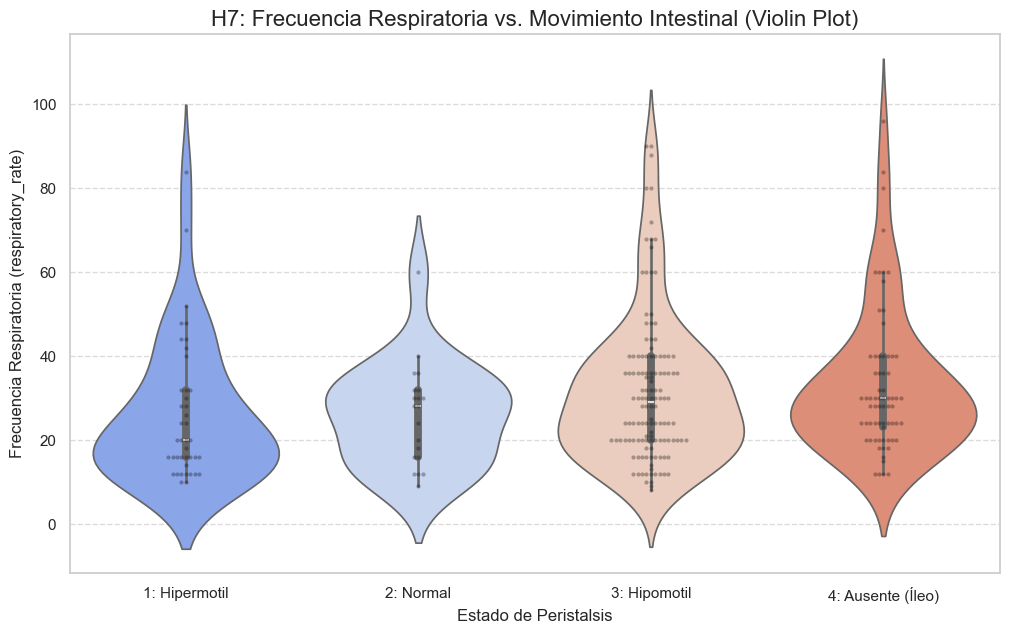

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt

# --- Preparación de Datos  ---

cols_h7 = ['respiratory_rate', 'peristalsis']
df_h7 = df_completo[cols_h7].dropna().copy()

peristalsis_map = {
    1.0: '1: Hipermotil',
    2.0: '2: Normal',
    3.0: '3: Hipomotil',
    4.0: '4: Ausente (Íleo)'
}
df_h7['peristalsis_label'] = df_h7['peristalsis'].map(peristalsis_map)
order_clinico = ['1: Hipermotil', '2: Normal', '3: Hipomotil', '4: Ausente (Íleo)']

print(f"Analizando {len(df_h7)} filas (sin NaNs).")

# --- Visualización (Violin Plot + Swarmplot) ---

plt.figure(figsize=(12, 7))

# 1. Gráfico de Violín: Muestra la distribución (KDE) y el boxplot interno
sns.violinplot(
    x='peristalsis_label',
    y='respiratory_rate',
    data=df_h7,
    order=order_clinico,
    palette='coolwarm'
)

# 2. Superponemos un swarmplot para ver los puntos de datos individuales
sns.swarmplot(
    x='peristalsis_label',
    y='respiratory_rate',
    data=df_h7,
    color='black',
    alpha=0.3, # Puntos semitransparentes
    size=3,
    order=order_clinico
)

plt.title('H7: Frecuencia Respiratoria vs. Movimiento Intestinal (Violin Plot)', fontsize=16)
plt.xlabel('Estado de Peristalsis', fontsize=12)
plt.ylabel('Frecuencia Respiratoria (respiratory_rate)', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Test de hipotesis (6) :
-  Test Estadístico (Kruskal-Wallis)

In [43]:
from scipy import stats
# --- Test Estadístico (Kruskal-Wallis) ---
# 1. Definir las variables de interés
cols_h7 = ['respiratory_rate', 'peristalsis']


df_h7 = df_completo[cols_h7].dropna().copy()

# --- Test de Kruskal-Wallis ---

# 1. Crear una lista de arrays, uno para cada grupo
grupo_1 = df_h7[df_h7['peristalsis'] == 1.0]['respiratory_rate'] # Hipermotil
grupo_2 = df_h7[df_h7['peristalsis'] == 2.0]['respiratory_rate'] # Normal
grupo_3 = df_h7[df_h7['peristalsis'] == 3.0]['respiratory_rate'] # Hipomotil
grupo_4 = df_h7[df_h7['peristalsis'] == 4.0]['respiratory_rate'] # Ausente

# 2. Ejecutar el test
# H0 (Hipótesis Nula): Las medianas son iguales en todos los grupos.
# H1 (Hipótesis Alternativa): Al menos una mediana es diferente.

H_statistic, p_value = stats.kruskal(grupo_1, grupo_2, grupo_3, grupo_4)

print("--- Resultados del Test de Kruskal-Wallis ---")
print(f"Estadístico H: {H_statistic:.4f}")
print(f"Valor p (p-value): {p_value}")

# 3. Interpretación
alpha = 0.05
if p_value < alpha:
    print(f"\nInterpretación (p < {alpha}):")
    print("Resultado ESTADÍSTICAMENTE SIGNIFICATIVO.")
    print("Rechazamos la hipótesis nula (H0).")
    print("Conclusión: Existe una diferencia significativa en la frecuencia respiratoria entre al menos dos de los grupos de peristalsis.")
else:
    print(f"\nInterpretación (p >= {alpha}):")
    print("Resultado NO estadísticamente significativo.")
    print("Conclusión: No hay evidencia estadística para afirmar una diferencia.")

--- Resultados del Test de Kruskal-Wallis ---
Estadístico H: 9.0319
Valor p (p-value): 0.028870150282033488

Interpretación (p < 0.05):
Resultado ESTADÍSTICAMENTE SIGNIFICATIVO.
Rechazamos la hipótesis nula (H0).
Conclusión: Existe una diferencia significativa en la frecuencia respiratoria entre al menos dos de los grupos de peristalsis.


# Conclusiones del Análisis

A lo largo de esta notebook, hemos ejecutado el proceso completo de análisis de datos sobre el dataset "Horse Colic". Las etapas incluyeron:

1.  **Carga y Limpieza:** Se realizó un pre-procesamiento exhaustivo para manejar la gran cantidad de valores faltantes (`NaN`) y preparar los datos para el análisis.
2.  **Análisis Exploratorio de Datos (EDA):** Mediante visualizaciones (histogramas, boxplots), identificamos las distribuciones de las variables más relevantes y su relación inicial con las variables objetivo (`outcome` ,`surgical_lesion`).
3.  **Ingeniería de Características:** Creamos nuevas variables (como el `shock_index`) para combinar predictores y potenciar el análisis.
4.  **Pruebas de Hipótesis:** Aplicamos tests estadísticos  para validar formalmente las diferencias observadas entre los grupos.


## ➡️ El Informe

Esta notebook ha servido como la base técnica y la fuente de evidencia para el trabajo.

El análisis detallado de estos hallazgos, la interpretación de los gráficos, la justificación de las decisiones tomadas (como los métodos de imputación de datos) y las conclusiones finales del trabajo se encuentran desarrolladas en profundidad en el **informe adjunto**.
